# Titanic - Machine Learning from Disaster

<img src="titanic1.webp">

# Projeto Titanic - Parte 2

- Parte 1: [Clique aqui](titanic_1.ipynb)

Nessa segunda parte iremos criar os primeiros modelos sem parametros, depois fazer o tuning melhorando os desempenhos. Por fim executando uma combinação dos modelos e visualização dos resultados

**Melhores resultados: 78.468% de precisão**

## Overview 
- ### Basic Model Building
    - [Naive Bayes](#Naive-Bayes)
    - [Regressão Logística](#Regressão-Logística)
    - [Arvore de Decisão](#Arvore-de-Decisão)
    - [Random Forest](#Random-Forest)
    - [KNN](#KNN)
    - [SVM](#SVM)
    - [Redes Neurais](#Redes-Neurais)
    - [Gradient Boosting Classifier](#Gradient-Boosting-Classifier) 
- ### Model Tuning
    - [Tuning](#Tuning)
- ### Results
    - [Comparing The Results](#Comparing)
    - [Validação Cruzada](#Cross-Validation)
    - [Teste de Normalidade](#Teste-de-Normalidade)
    - [ANOVA/Tukey](#ANOVA/Tukey)
    - [Saving/Load Classifier](#Saving/Load-Classifier)
- ### Ensemble Modle Building
    - [Voting Classifier](#Voting-Classifier)
    - [Final Results](#Final-Results)

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix
from scipy.stats import shapiro
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison

In [2]:
# Salvando a feature PassengerId pois precisamos dessa coluna para submeter os resultados ao Kaggle
test = pd.read_csv('test.csv')
PassengerId = test['PassengerId']

In [3]:
# Carregando os dados que foram tratados na parte 1
with open('Titanic.pkl', 'rb') as f:
  X_train, X_test, y_train, y_test, test = pickle.load(f)

# Basic Model Building
#### Construção dos modelos (sem parametros)
- Antes de prosseguir, gosto de ver o desempenho de vários modelos diferentes com parâmetros padrão. Tentei os seguintes modelos usando validação cruzada de 10 vezes para obter uma linha de base. Com uma linha de base do conjunto de validação, podemos ver o quanto o ajuste dos parametros melhora cada um dos modelos.
- Vamos criar um função que avalia o modelo com varias metricas diferentes, além de gerar uma matriz de confusão

In [4]:
algoritmos = ['Naive Bayes', 'Regressão Logistica', 'Arvore', 'Random Forest', 'KNN', 'SVM', 'Redes Neurais', 'Gradient']
resultados = ['Validação Cruzada Máximo', 'Validação Cruzada Mínimo', 'Validação Cruzada Média', 'Accuracy Score', 'Precision', 'Recall']
resultados_metricas = pd.DataFrame(columns=resultados)

In [5]:
resultados_metricas

,Validação Cruzada Máximo,Validação Cruzada Mínimo,Validação Cruzada Média,Accuracy Score,Precision,Recall


In [6]:
def avaliador_de_algoritmos(modelo):
    modelo.fit(X_train, y_train)
    cv = cross_val_score(modelo,X_train,y_train,cv=10)
    previsoes = modelo.predict(X_test)
    ac = accuracy_score(y_test, previsoes)
    cm = ConfusionMatrix(modelo)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    precision = precision_score(y_test, previsoes)
    recall = recall_score(y_test, previsoes)

    resultados = {
    'Validação Cruzada Máximo': cv.max(),
    'Validação Cruzada Mínimo': cv.min(),
    'Validação Cruzada Média': cv.mean(),
    'Accuracy Score': ac,
    'Precision': precision,
    'Recall': recall
    }
    
    str_modelo = str(modelo)
    index = str_modelo.split('(')
    resultados_metricas.loc[index[0]] = resultados
    
    return resultados_metricas

# Naive Bayes

,Validação Cruzada Máximo,Validação Cruzada Mínimo,Validação Cruzada Média,Accuracy Score,Precision,Recall
GaussianNB,0.915493,0.704225,0.792077,0.782123,0.710843,0.797297


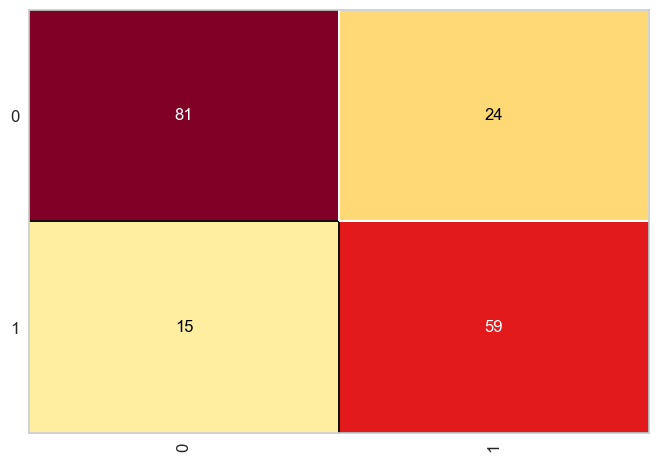

In [7]:
naive_bayes = GaussianNB()
avaliador_de_algoritmos(naive_bayes)

# Regressão Logística

,Validação Cruzada Máximo,Validação Cruzada Mínimo,Validação Cruzada Média,Accuracy Score,Precision,Recall
GaussianNB,0.915493,0.704225,0.792077,0.782123,0.710843,0.797297
LogisticRegression,0.957746,0.746479,0.813165,0.793296,0.753425,0.743243


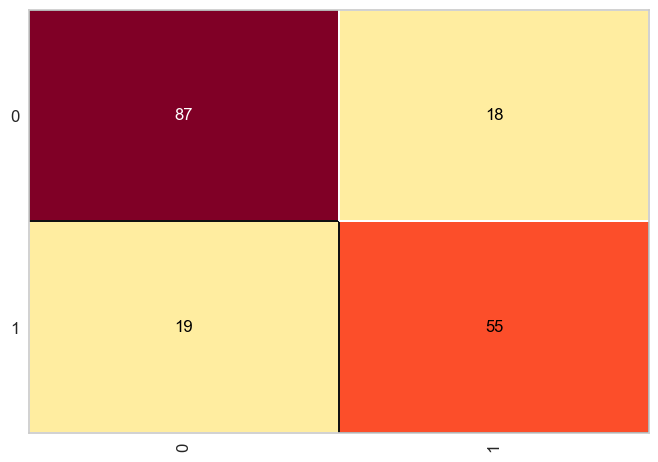

In [8]:
regressao = LogisticRegression(max_iter = 2000)
avaliador_de_algoritmos(regressao)

# Arvore de Decisão

,Validação Cruzada Máximo,Validação Cruzada Mínimo,Validação Cruzada Média,Accuracy Score,Precision,Recall
GaussianNB,0.915493,0.704225,0.792077,0.782123,0.710843,0.797297
LogisticRegression,0.957746,0.746479,0.813165,0.793296,0.753425,0.743243
DecisionTreeClassifier,0.805556,0.760563,0.780888,0.776536,0.723684,0.743243


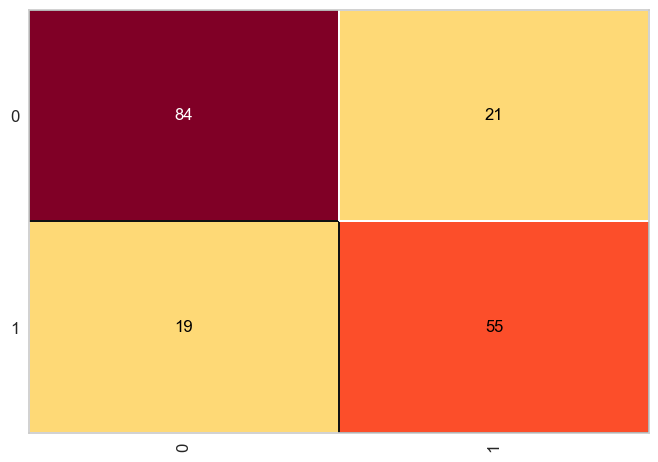

In [9]:
arvore = tree.DecisionTreeClassifier(random_state = 1)
avaliador_de_algoritmos(arvore)

# Random Forest

,Validação Cruzada Máximo,Validação Cruzada Mínimo,Validação Cruzada Média,Accuracy Score,Precision,Recall
GaussianNB,0.915493,0.704225,0.792077,0.782123,0.710843,0.797297
LogisticRegression,0.957746,0.746479,0.813165,0.793296,0.753425,0.743243
DecisionTreeClassifier,0.805556,0.760563,0.780888,0.776536,0.723684,0.743243
RandomForestClassifier,0.873239,0.732394,0.799218,0.843575,0.810811,0.810811


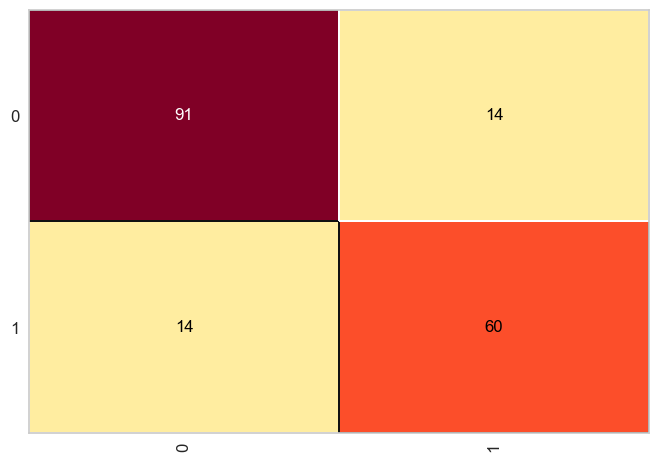

In [10]:
rf = RandomForestClassifier(random_state = 1)
avaliador_de_algoritmos(rf)

# KNN

,Validação Cruzada Máximo,Validação Cruzada Mínimo,Validação Cruzada Média,Accuracy Score,Precision,Recall
GaussianNB,0.915493,0.704225,0.792077,0.782123,0.710843,0.797297
LogisticRegression,0.957746,0.746479,0.813165,0.793296,0.753425,0.743243
DecisionTreeClassifier,0.805556,0.760563,0.780888,0.776536,0.723684,0.743243
RandomForestClassifier,0.873239,0.732394,0.799218,0.843575,0.810811,0.810811
KNeighborsClassifier,0.873239,0.732394,0.803326,0.826816,0.794521,0.783784


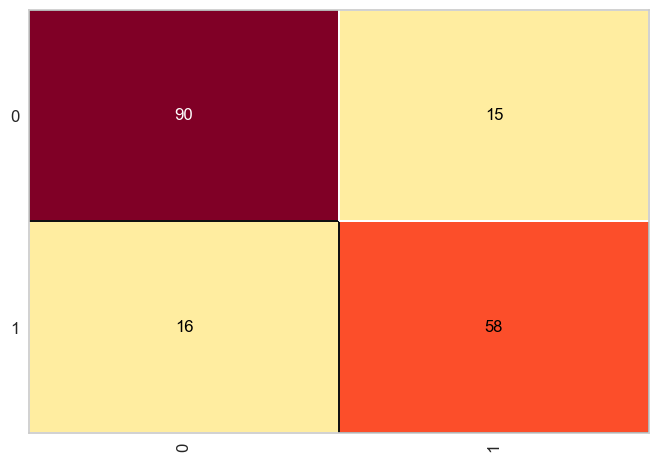

In [11]:
knn = KNeighborsClassifier()
avaliador_de_algoritmos(knn)

# SVM

,Validação Cruzada Máximo,Validação Cruzada Mínimo,Validação Cruzada Média,Accuracy Score,Precision,Recall
GaussianNB,0.915493,0.704225,0.792077,0.782123,0.710843,0.797297
LogisticRegression,0.957746,0.746479,0.813165,0.793296,0.753425,0.743243
DecisionTreeClassifier,0.805556,0.760563,0.780888,0.776536,0.723684,0.743243
RandomForestClassifier,0.873239,0.732394,0.799218,0.843575,0.810811,0.810811
KNeighborsClassifier,0.873239,0.732394,0.803326,0.826816,0.794521,0.783784
SVC,0.943662,0.732394,0.823044,0.826816,0.811594,0.756757


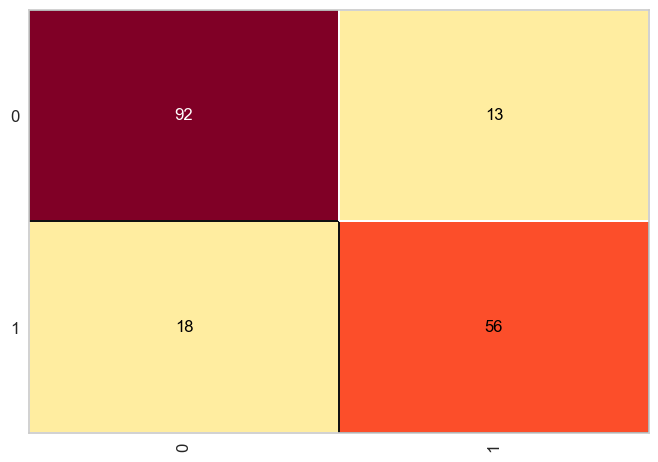

In [12]:
svm = SVC()
avaliador_de_algoritmos(svm)

# Redes Neurais

,Validação Cruzada Máximo,Validação Cruzada Mínimo,Validação Cruzada Média,Accuracy Score,Precision,Recall
GaussianNB,0.915493,0.704225,0.792077,0.782123,0.710843,0.797297
LogisticRegression,0.957746,0.746479,0.813165,0.793296,0.753425,0.743243
DecisionTreeClassifier,0.805556,0.760563,0.780888,0.776536,0.723684,0.743243
RandomForestClassifier,0.873239,0.732394,0.799218,0.843575,0.810811,0.810811
KNeighborsClassifier,0.873239,0.732394,0.803326,0.826816,0.794521,0.783784
SVC,0.943662,0.732394,0.823044,0.826816,0.811594,0.756757
MLPClassifier,0.915493,0.746479,0.811776,0.810056,0.803030,0.716216


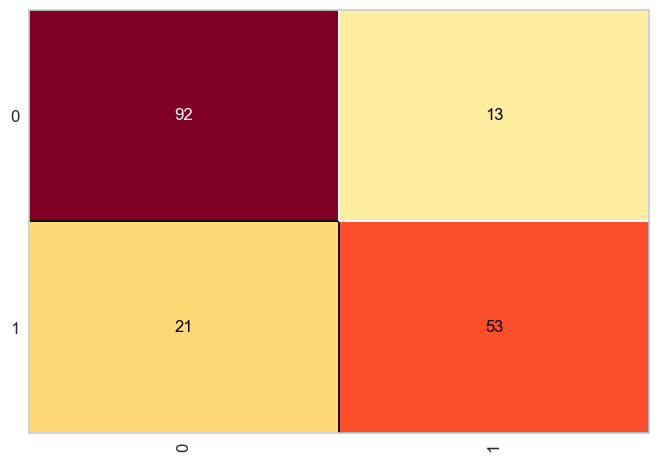

In [13]:
rna = MLPClassifier(max_iter = 900, random_state = 1)
avaliador_de_algoritmos(rna)

# Gradient Boosting Classifier

,Validação Cruzada Máximo,Validação Cruzada Mínimo,Validação Cruzada Média,Accuracy Score,Precision,Recall
GaussianNB,0.915493,0.704225,0.792077,0.782123,0.710843,0.797297
LogisticRegression,0.957746,0.746479,0.813165,0.793296,0.753425,0.743243
DecisionTreeClassifier,0.805556,0.760563,0.780888,0.776536,0.723684,0.743243
RandomForestClassifier,0.873239,0.732394,0.799218,0.843575,0.810811,0.810811
KNeighborsClassifier,0.873239,0.732394,0.803326,0.826816,0.794521,0.783784
SVC,0.943662,0.732394,0.823044,0.826816,0.811594,0.756757
MLPClassifier,0.915493,0.746479,0.811776,0.810056,0.803030,0.716216
GradientBoostingClassifier,0.915493,0.760563,0.825802,0.821229,0.818182,0.729730


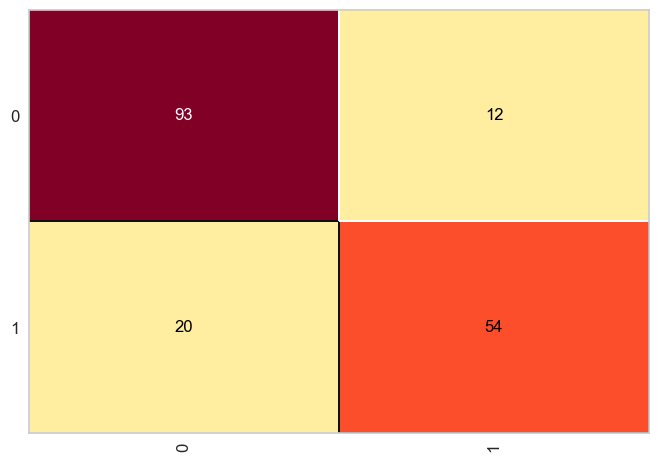

In [14]:
gradient = GradientBoostingClassifier()
avaliador_de_algoritmos(gradient)

In [15]:
# Exibindo todos os resultados, com validação cruzada, accuracy score, precision e recall
resultados_metricas

,Validação Cruzada Máximo,Validação Cruzada Mínimo,Validação Cruzada Média,Accuracy Score,Precision,Recall
GaussianNB,0.915493,0.704225,0.792077,0.782123,0.710843,0.797297
LogisticRegression,0.957746,0.746479,0.813165,0.793296,0.753425,0.743243
DecisionTreeClassifier,0.805556,0.760563,0.780888,0.776536,0.723684,0.743243
RandomForestClassifier,0.873239,0.732394,0.799218,0.843575,0.810811,0.810811
KNeighborsClassifier,0.873239,0.732394,0.803326,0.826816,0.794521,0.783784
SVC,0.943662,0.732394,0.823044,0.826816,0.811594,0.756757
MLPClassifier,0.915493,0.746479,0.811776,0.810056,0.803030,0.716216
GradientBoostingClassifier,0.915493,0.760563,0.825802,0.821229,0.818182,0.729730


# Tuning
#### Teste dos parametros para todos os modelos
- Será testado todos os conjuntos de parametros especificados em cada um dos modelos
- O Naive Bayes é um algoritmo bastante simples e robusto, e muitas vezes não requer ajuste de hiperparâmetros.

In [16]:
res = pd.DataFrame(resultados_metricas['Validação Cruzada Média']) # df novo só com essa coluna
res_param = [0.0] # vamos guardar os scores aqui para comparar com o df acima

In [17]:
# Função que imprime o nome do classificador, seu melhor resultado e os melhores combinações de parametros encontrados
def clf_performance(classifier, model_name, res_param):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))
    res_param.append(classifier.best_score_)
    return res_param

In [18]:
import warnings
from sklearn.exceptions import FitFailedWarning

# Como vamos testar muitos parametros isso gera um erro nos treinos, vamos ignorar os avisos dos treinos que falharam e exibir os resultados
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [19]:
# Regressão Logistica
lr = LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'],
              'tol': [0.0001, 0.001, 0.01],
              'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'solver' : ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
              'max_iter' : [2000]}

clf_lr = GridSearchCV(lr, param_grid = param_grid, verbose = True, cv = 10, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression', res_param)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Logistic Regression
Best Score: 0.8145735524256651
Best Parameters: {'C': 0.1, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}


[0.0, 0.8145735524256651]

In [20]:
# Arvore de Decisão
arvore = tree.DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 3, 5, 10, 20],
              'min_samples_split': [n for n in range(2, 11)],
              'min_samples_leaf': [n for n in range(1, 16)],
              'max_features': ['auto', 'sqrt', 'log2']}

clf_arvore = GridSearchCV(arvore, param_grid = param_grid, verbose = True, cv = 10, n_jobs = -1)
best_clf_arvore = clf_arvore.fit(X_train,y_train)
clf_performance(best_clf_arvore,'Decision Tree', res_param)

Fitting 10 folds for each of 12150 candidates, totalling 121500 fits
Decision Tree
Best Score: 0.8314162754303599
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'}


[0.0, 0.8145735524256651, 0.8314162754303599]

In [21]:
# Random Forest
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200],
              'criterion': ['gini','entropy'],
              'max_depth': [None, 3, 5, 10, 20, 25],
              'min_samples_split': [2, 3, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto','sqrt','log2', None],
              'bootstrap': [True, False]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest', res_param)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
Random Forest
Best Score: 0.8482812961686201
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


[0.0, 0.8145735524256651, 0.8314162754303599, 0.8482812961686201]

In [22]:
# KNN
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [n for n in range(3, 25)],
              'weights' : ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 10, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN', res_param)

KNN
Best Score: 0.8314358372456964
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 12, 'p': 2, 'weights': 'uniform'}


[0.0,
 0.8145735524256651,
 0.8314162754303599,
 0.8482812961686201,
 0.8314358372456964]

In [23]:
# SVM
svc = SVC(probability = True)
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.001, 0.01, 0.1],
    'gamma': [0.001, 0.01, 0.1],
    'degree': [2, 3, 4]
}
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC', res_param)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
SVC
Best Score: 0.8300305328474342
Best Parameters: {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}


[0.0,
 0.8145735524256651,
 0.8314162754303599,
 0.8482812961686201,
 0.8314358372456964,
 0.8300305328474342]

In [24]:
# Rede Neural
rna = MLPClassifier(random_state = 1)
param_grid = [{'activation': ['relu', 'logistic', 'tanh'],
              'solver': ['adam', 'sgd'],
              'batch_size': [56],
              'max_iter': [2500],
              'hidden_layer_sizes': [(5,5), (10,10), (20,20)]}]
                                  
clf_rna = GridSearchCV(rna, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rna = clf_rna.fit(X_train,y_train)
clf_performance(best_clf_rna,'Rede Neurais', res_param)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Rede Neurais
Best Score: 0.8258150300403821
Best Parameters: {'activation': 'relu', 'batch_size': 56, 'hidden_layer_sizes': (10, 10), 'max_iter': 2500, 'solver': 'sgd'}


[0.0,
 0.8145735524256651,
 0.8314162754303599,
 0.8482812961686201,
 0.8314358372456964,
 0.8300305328474342,
 0.8258150300403821]

In [25]:
# Gradient Boosting
gbc = GradientBoostingClassifier()
param_grid = [{'max_depth': [n for n in range(1, 5)],     
    'min_samples_split': [n for n in range(2, 6)], 
    'min_samples_leaf': [n for n in range(2, 6)],     
    'n_estimators': [n for n in range(10, 50, 10)],}]

clf_gbc = GridSearchCV(gbc, param_grid = param_grid, cv = 10, n_jobs = -1)
best_clf_gbc = clf_gbc.fit(X_train,y_train)
clf_performance(best_clf_gbc,'Gradient Boosting', res_param)

Gradient Boosting
Best Score: 0.8328834115805946
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


[0.0,
 0.8145735524256651,
 0.8314162754303599,
 0.8482812961686201,
 0.8314358372456964,
 0.8300305328474342,
 0.8258150300403821,
 0.8328834115805946]

# Comparing
#### Comparando os resultados dos modelos com e sem o tuning dos parametros
- Podemos notar que todos os modelos tiveram uma melhoria na acuracia
- Alguns modelos não sofreram alterações relevantes nos resultados, pois nem sempre o tuning acaba melhorando o desempenho do modelo

In [26]:
# Adicionando os resultados com tuning no DF
res['Com Tuning'] = res_param
res

,Validação Cruzada Média,Com Tuning
GaussianNB,0.792077,0.000000
LogisticRegression,0.813165,0.814574
DecisionTreeClassifier,0.780888,0.831416
RandomForestClassifier,0.799218,0.848281
KNeighborsClassifier,0.803326,0.831436
SVC,0.823044,0.830031
MLPClassifier,0.811776,0.825815
GradientBoostingClassifier,0.825802,0.832883


In [27]:
# Criando a coluna diferença para uma melhor visualização
diferenca = res['Com Tuning'] - res['Validação Cruzada Média']
res['Melhoria'] = diferenca
res['Melhoria'] = res.Melhoria.replace(res['Melhoria'].iloc[0], 0.000000)

In [28]:
# Arvore de decisão melhorou 6%
# Random Forest melhorou 5%
# KNN melhorou 3%
# Redes Neurais melhorou 1%
res

,Validação Cruzada Média,Com Tuning,Melhoria
GaussianNB,0.792077,0.000000,0.000000
LogisticRegression,0.813165,0.814574,0.001408
DecisionTreeClassifier,0.780888,0.831416,0.050528
RandomForestClassifier,0.799218,0.848281,0.049064
KNeighborsClassifier,0.803326,0.831436,0.028110
SVC,0.823044,0.830031,0.006987
MLPClassifier,0.811776,0.825815,0.014039
GradientBoostingClassifier,0.825802,0.832883,0.007081


# Cross Validation
#### Avaliação dos resultados (com o ajuste de parametros)
- Na analise dos resultados dos modelos sem parametros, usamos as métricas validação cruzada, accuracy score, precision, recall e matriz de confusão
    - Agora com os melhores parametros, vamos usar a média dos resultados da validação cruzada para vermos se houve uma melhora nos resultados após o Tuning dos parametros

In [29]:
# Criando cada modelo com a melhor combinação de parametros
best_lr = best_clf_lr.best_estimator_
best_tree = best_clf_arvore.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_rna = best_clf_rna.best_estimator_
best_gbc = best_clf_gbc.best_estimator_

In [30]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []
resultados_gradient = []

# folds significa o numero de partes que a base de treino e teste será separada
# Na variavel resultados temos a media dos 10 resultados, vamos usar esses resultados para fazer o comparativo entre os algoritmos

for i in range(30):
    print(f'Teste: {i + 1}')
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    scores = cross_val_score(best_tree, X_train, y_train, cv = kfold)
    resultados_arvore.append(scores.mean())

    scores = cross_val_score(best_rf, X_train, y_train, cv = kfold)
    resultados_random_forest.append(scores.mean())

    scores = cross_val_score(best_knn, X_train, y_train, cv = kfold)
    resultados_knn.append(scores.mean())

    scores = cross_val_score(best_lr, X_train, y_train, cv = kfold)
    resultados_logistica.append(scores.mean())

    scores = cross_val_score(best_svc, X_train, y_train, cv = kfold)
    resultados_svm.append(scores.mean())

    scores = cross_val_score(best_rna, X_train, y_train, cv = kfold)
    resultados_rede_neural.append(scores.mean())
    
    scores = cross_val_score(best_gbc, X_train, y_train, cv = kfold)
    resultados_gradient.append(scores.mean())

Teste: 1
Teste: 2
Teste: 3
Teste: 4
Teste: 5
Teste: 6
Teste: 7
Teste: 8
Teste: 9
Teste: 10
Teste: 11
Teste: 12
Teste: 13
Teste: 14
Teste: 15
Teste: 16
Teste: 17
Teste: 18
Teste: 19
Teste: 20
Teste: 21
Teste: 22
Teste: 23
Teste: 24
Teste: 25
Teste: 26
Teste: 27
Teste: 28
Teste: 29
Teste: 30


In [31]:
# Criando um DataFrame para exibir as médias dos resultados de cada algoritmo
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural,
                           'GBC': resultados_gradient})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural,GBC
0,0.806358,0.841432,0.842860,0.813341,0.833020,0.823220,0.835837
1,0.780732,0.834174,0.828580,0.807473,0.839808,0.821577,0.828541
2,0.801917,0.832786,0.841295,0.806123,0.837070,0.821557,0.832844
3,0.803443,0.832864,0.837070,0.816021,0.837031,0.831397,0.827230
4,0.804714,0.835681,0.834253,0.811796,0.838439,0.824354,0.830086
5,0.799139,0.835642,0.834233,0.808959,0.835642,0.815962,0.828678
6,0.796322,0.835720,0.827210,0.816002,0.839867,0.823044,0.827210
7,0.811815,0.827445,0.832883,0.807766,0.839906,0.820266,0.828736
8,0.803365,0.837011,0.835681,0.813126,0.837050,0.828619,0.829988
9,0.804773,0.827230,0.834292,0.813185,0.835681,0.821557,0.822985


In [32]:
# Resumo estatístico das respostas
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural,GBC
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.802115,0.834192,0.835257,0.810633,0.837312,0.823732,0.829499
std,0.008413,0.003978,0.004213,0.003164,0.003036,0.004199,0.004253
min,0.780732,0.827230,0.827210,0.801800,0.831416,0.815962,0.818740
25%,0.798039,0.831519,0.832913,0.808945,0.835705,0.820290,0.827230
50%,0.803404,0.834243,0.835563,0.810417,0.837060,0.823171,0.829362
75%,0.805961,0.836708,0.837065,0.813185,0.839852,0.825988,0.832820
max,0.821714,0.842723,0.845520,0.816021,0.844131,0.832746,0.838517


# Teste de Normalidade
- #### Para fazermos a ANOVA e o teste de Tukey, precisamos fazer primeiro um teste de normalidade para descobrir se os dados possuem uma distribuição normal

In [33]:
alpha = 0.05
resultados_shapiro = []
shapiro_arvore = shapiro(resultados_arvore)
resultados_shapiro.append(shapiro_arvore)
shapiro_forest = shapiro(resultados_random_forest)
resultados_shapiro.append(shapiro_forest)
shapiro_knn = shapiro(resultados_knn)
resultados_shapiro.append(shapiro_knn)
shapiro_log = shapiro(resultados_logistica)
resultados_shapiro.append(shapiro_log)
shapiro_svm = shapiro(resultados_svm)
resultados_shapiro.append(shapiro_svm)
shapiro_rede = shapiro(resultados_rede_neural)
resultados_shapiro.append(shapiro_rede)
shapiro_gbc = shapiro(resultados_gradient)
resultados_shapiro.append(shapiro_gbc)

In [34]:
def verifica_distribuicao(resultados_shapiro):
    count = 0
    limit = len(resultados_shapiro)
    for resultado in resultados_shapiro:
        if resultado[1] > alpha:
            count += 1
    if count == limit:
        print('Todos os dados estão em uma distribuição normal')
    else:
        print('Todos os dados NÃO tem uma distribuição normal')

In [35]:
# Visualizando o p_value
resultados_shapiro

[ShapiroResult(statistic=0.9524590969085693, pvalue=0.19666188955307007),
 ShapiroResult(statistic=0.9700003862380981, pvalue=0.5391852855682373),
 ShapiroResult(statistic=0.9688780307769775, pvalue=0.5089505314826965),
 ShapiroResult(statistic=0.9588580131530762, pvalue=0.28955206274986267),
 ShapiroResult(statistic=0.9553912281990051, pvalue=0.2351551502943039),
 ShapiroResult(statistic=0.9757645726203918, pvalue=0.7052520513534546),
 ShapiroResult(statistic=0.9850515127182007, pvalue=0.9380607008934021)]

In [36]:
verifica_distribuicao(resultados_shapiro)

Todos os dados estão em uma distribuição normal


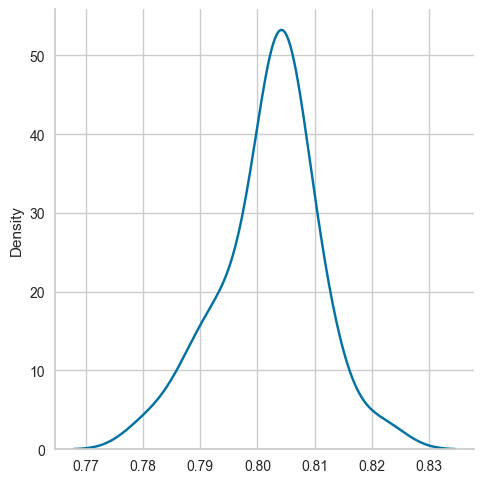

In [37]:
# Visualizando a distribuição dos dados do resultado da arvore de decisão
sns.displot(resultados_arvore, kind = 'kde');

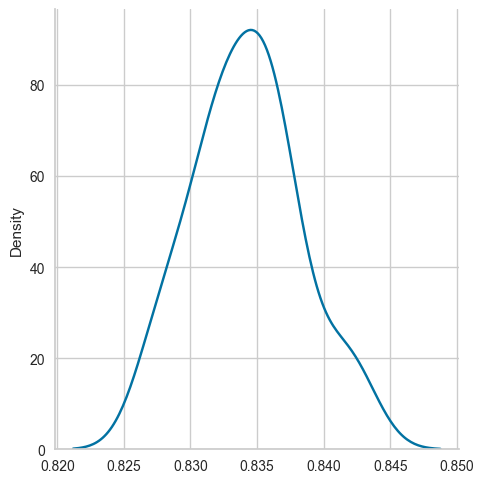

In [38]:
# Visualizando a distribuição dos dados do resultado do random forest
sns.displot(resultados_random_forest, kind = 'kde');

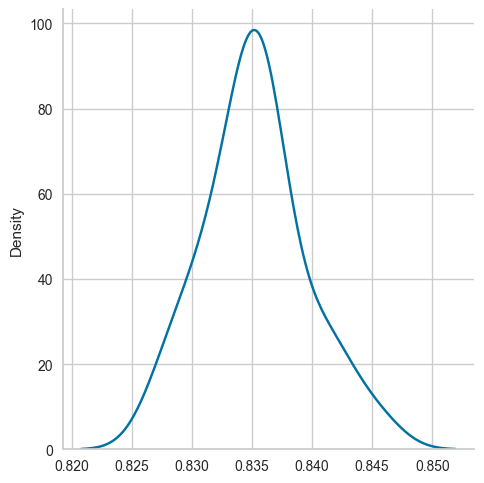

In [39]:
# Visualizando a distribuição dos dados do resultado do knn
sns.displot(resultados_knn, kind = 'kde');

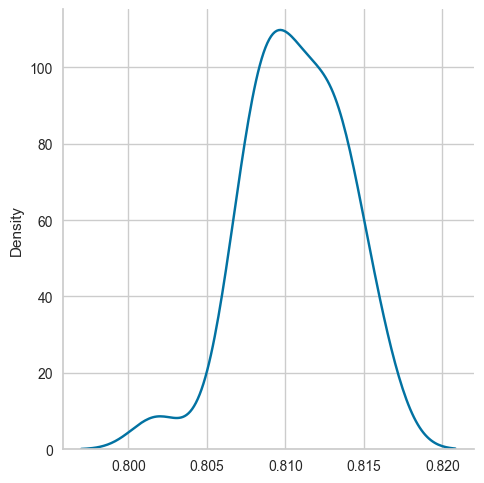

In [40]:
# Visualizando a distribuição dos dados do resultado da regressão logistica
sns.displot(resultados_logistica, kind = 'kde');

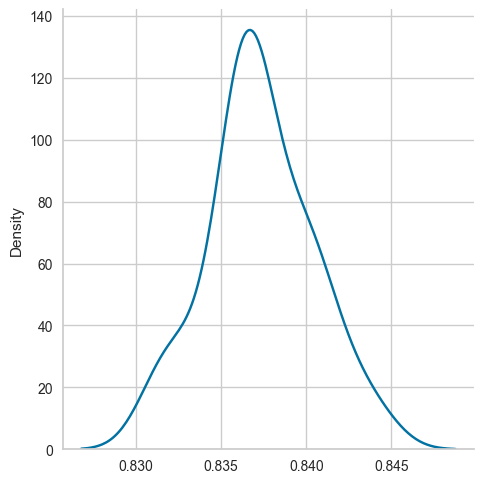

In [41]:
# Visualizando a distribuição dos dados do resultado do SVM
sns.displot(resultados_svm, kind = 'kde');

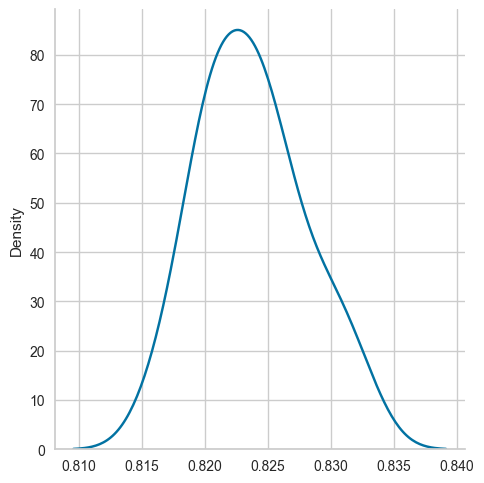

In [42]:
# Visualizando a distribuição dos dados da Rede Neural
sns.displot(resultados_rede_neural, kind = 'kde');

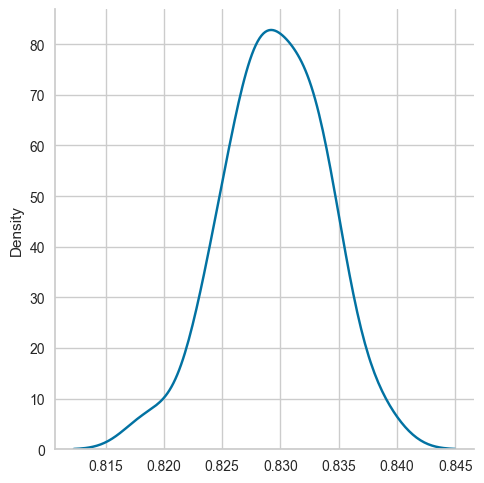

In [43]:
# Visualizando a distribuição dos dados do Gradient Boosting Classifier
sns.displot(resultados_gradient, kind = 'kde');

# ANOVA/Tukey
#### Teste de Hipotese
- A hipotese nula é que os resultados são iguais, que não existe diferença estatistica entre o resultados dos modelos
- A hipotese alternativa é que existe essa diferença
    - Se a hipotese nula fosse aceita, não haveria diferença em qual modelo usar
    - O teste de ANOVA vai nos ajudar a decidirmos se existe essa diferença estatistica
    - O teste de Tukey vai indicar qual modelo de fato é o melhor

#### ANOVA

In [44]:
# Essa função retorna dois valores, não precisamos do primeiro valor
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural, resultados_gradient)
p

2.6806752834427654e-89

In [45]:
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


#### Tukey

In [46]:
# Agora vamos verificar de fato qual é o melhor algoritmo
# Vamos criar um dataframe, com 2 colunas, accuracy e algoritmo
resultados = {
    'arvore': resultados_arvore,
    'random_forest': resultados_random_forest,
    'knn': resultados_knn,
    'logistica': resultados_logistica,
    'svm': resultados_svm,
    'rede_neural': resultados_rede_neural,
    'gradient': resultados_gradient
}

resultados_algoritmos = {'accuracy': np.concatenate([resultado for resultado in resultados.values()]),
                         'algoritmo': [algoritmo for algoritmo, _ in resultados.items() for _ in range(len(resultados[algoritmo]))]}

In [47]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.806358,arvore
1,0.780732,arvore
2,0.801917,arvore
3,0.803443,arvore
4,0.804714,arvore
...,...,...
205,0.824472,gradient
206,0.834292,gradient
207,0.834135,gradient
208,0.831475,gradient


In [48]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [49]:
# Em todos os True quer dizer que há diferença entre os algoritmos, e False não
# Portanto, o melhor modelo individualmente, foi o gradient boosting classifier
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore      gradient   0.0274    0.0  0.0237  0.0311   True
       arvore           knn   0.0331    0.0  0.0295  0.0368   True
       arvore     logistica   0.0085    0.0  0.0049  0.0122   True
       arvore random_forest   0.0321    0.0  0.0284  0.0357   True
       arvore   rede_neural   0.0216    0.0  0.0179  0.0253   True
       arvore           svm   0.0352    0.0  0.0315  0.0389   True
     gradient           knn   0.0058 0.0001  0.0021  0.0094   True
     gradient     logistica  -0.0189    0.0 -0.0225 -0.0152   True
     gradient random_forest   0.0047 0.0034   0.001  0.0084   True
     gradient   rede_neural  -0.0058 0.0001 -0.0094 -0.0021   True
     gradient           svm   0.0078    0.0  0.0041  0.0115   True
          knn     logistica  -0.0246    0.0 -0.0283  -0.021   

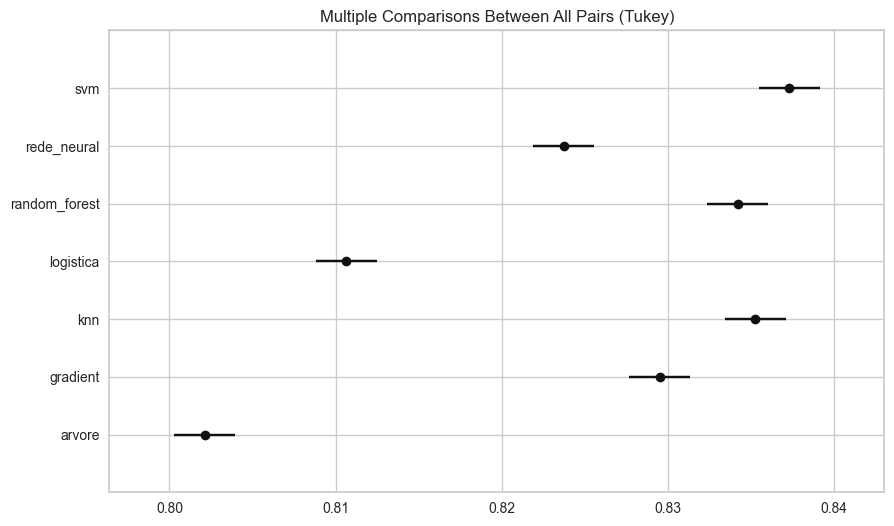

In [50]:
teste_estatistico.plot_simultaneous();

# Saving/Load Classifier
- #### Salvando os classificadores
    - #### Executar apenas se necessário

In [51]:
pickle.dump(best_lr, open('regressao_logistica.sav', 'wb'))
pickle.dump(best_tree, open('arvore_decisao.sav', 'wb'))
pickle.dump(best_knn, open('knn.sav', 'wb'))
pickle.dump(best_svc, open('svm.sav', 'wb'))
pickle.dump(best_rf, open('random_forest.sav', 'wb'))
pickle.dump(best_rna, open('redes_neurais.sav', 'wb'))
pickle.dump(best_gbc, open('gradient.sav', 'wb'))

In [52]:
best_lr = pickle.load(open('regressao_logistica.sav', 'rb'))
best_tree = pickle.load(open('arvore_decisao.sav', 'rb'))
best_knn = pickle.load(open('knn.sav', 'rb'))
best_svc = pickle.load(open('svm.sav', 'rb'))
best_rf = pickle.load(open('random_forest.sav', 'rb'))
best_rna = pickle.load(open('redes_neurais.sav', 'rb'))
best_gbc = pickle.load(open('gradient.sav', 'rb'))

# Ensemble Model Building
#### Combinação de modelos
- De acordo com o grafico acima, os 3 melhores modelos foram gradient, random forest e svm
- Vamos ter 7 modelos finais que usaremos nas nossas previsões:
    - Os 3 modelos individuais
    - Combinação com votação hard dos 3 melhores
    - Combinacao soft dos 3 melhores
    - Combinação hard de todos os modelos
    - Combincao soft de todos os modelos
        - Hard: Votação por quantidade
        - Soft: Votação considerando a confiança 

# Voting Classifier

In [53]:
voting_clf_hard = VotingClassifier(estimators = [('gradient',best_gbc),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('gradient',best_gbc),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all_hard = VotingClassifier(estimators = [('arvore',best_tree),('knn',best_knn),('rf',best_rf),('svc',best_svc),('lr', best_lr),('RNA',best_clf_rna),('gradient',best_gbc)], voting = 'hard') 
voting_clf_all_soft = VotingClassifier(estimators = [('arvore',best_tree),('knn',best_knn),('rf',best_rf),('svc',best_svc),('lr', best_lr),('RNA',best_clf_rna),('gradient',best_gbc)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=10))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=10).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=10))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=10).mean())

print('voting_clf_all_hard :',cross_val_score(voting_clf_all_hard,X_train,y_train,cv=10))
print('voting_clf_all_hard mean :',cross_val_score(voting_clf_all_hard,X_train,y_train,cv=10).mean())

print('voting_clf_all_soft :',cross_val_score(voting_clf_all_soft,X_train,y_train,cv=10))
print('voting_clf_all_soft mean :',cross_val_score(voting_clf_all_soft,X_train,y_train,cv=10).mean())

voting_clf_hard : [0.84722222 0.83333333 0.76056338 0.97183099 0.91549296 0.74647887
 0.85915493 0.81690141 0.8028169  0.91549296]
voting_clf_hard mean : 0.8455203442879498
voting_clf_soft : [0.86111111 0.81944444 0.76056338 0.94366197 0.88732394 0.74647887
 0.83098592 0.8028169  0.8028169  0.92957746]
voting_clf_soft mean : 0.8384780907668231
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
voting_clf_all_hard : [0.86111111 0.81944444

In [54]:
# Fazendo os treinamentos e previsões finais
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)
voting_clf_all_hard.fit(X_train, y_train)
voting_clf_all_soft.fit(X_train, y_train)
best_rf.fit(X_train, y_train)
best_gbc.fit(X_train, y_train)
best_svc.fit(X_train, y_train)

# Individual
y_hat_rf = best_rf.predict(test).astype(int)
y_hat_gbc = best_gbc.predict(test).astype(int)
y_hat_svc = best_svc.predict(test).astype(int)

# Votação
y_hat_vc_hard = voting_clf_hard.predict(test).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(test).astype(int)
y_hat_vc_all_hard = voting_clf_all_hard.predict(test).astype(int)
y_hat_vc_all_soft = voting_clf_all_soft.predict(test).astype(int)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


# Final Results

In [55]:
# Convertendo os resultados finais em um DataFrame
final_data = {'PassengerId': PassengerId, 'Survived': y_hat_rf}
random_forest = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': PassengerId, 'Survived': y_hat_gbc}
gradient = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': PassengerId, 'Survived': y_hat_svc}
svm = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': PassengerId, 'Survived': y_hat_vc_hard}
rf_gb_svm_hard = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': PassengerId, 'Survived': y_hat_vc_soft}
rf_gb_svm_soft = pd.DataFrame(data=final_data_5)

final_data_6 = {'PassengerId': PassengerId, 'Survived': y_hat_vc_all_hard}
all_hard = pd.DataFrame(data=final_data_6)

final_data_7 = {'PassengerId': PassengerId, 'Survived': y_hat_vc_all_soft}
all_soft = pd.DataFrame(data=final_data_7)

In [56]:
# Submissão ao Kaggle
random_forest.to_csv('random_forest.csv', index =False)
gradient.to_csv('gradient.csv',index=False)
svm.to_csv('svm.csv', index=False)
rf_gb_svm_hard.to_csv('rf_gb_svm_hard.csv', index=False)
rf_gb_svm_soft.to_csv('rf_gb_svm_soft.csv', index=False)
all_hard.to_csv('all_hard.csv', index=False)
all_soft.to_csv('all_soft.csv', index=False)